In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, NMF, FactorAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

import sys
sys.path.append("../lib/")
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')



SyntaxError: invalid syntax (3473163303.py, line 23)

In [2]:
dataset = "L_540_2022_C_E_R_B"
results_path = Path("../results/") / dataset
data = pd.read_csv(results_path / (dataset + "_preprocessed.csv"))
data = data.drop(columns=['file'], axis=1)

In [3]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
classifiers = [
    ('LDA', LDA()),
    
    ('PCA-LDA', Pipeline([('pca', PCA(n_components=50)),
        ('lda', LDA())])),
    
    ('NMF-LDA', Pipeline([('nmf', NMF(n_components=40, max_iter=10000)),
        ('lda', LDA())])),
    
    ('FA-LDA', Pipeline([('fa', FactorAnalysis(n_components=40, max_iter=10000)),
        ('lda', LDA())])),
    
    ('LogReg L1', LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial')),
    ('LogReg L2', LogisticRegression(penalty='l2', solver='saga', multi_class='multinomial')),
    ('SVM L1', SVC(kernel='linear', probability=True)),
    ('SVM L2', SVC(kernel='rbf', probability=True)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100))
]

In [17]:
def nested_cv(X, y, classifiers):
    results = {}
    for name, clf in classifiers:
        scores = cross_validate(clf, X, y, cv=5, return_train_score=True, scoring=['accuracy'], n_jobs=-1)
        results[name] = scores
    return results
results = nested_cv(X, y, classifiers)

/apps/anaconda3/envs/raman/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/anaconda3/envs/raman/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/anaconda3/envs/raman/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/anaconda3/envs/raman/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/apps/anaconda3/envs/raman/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


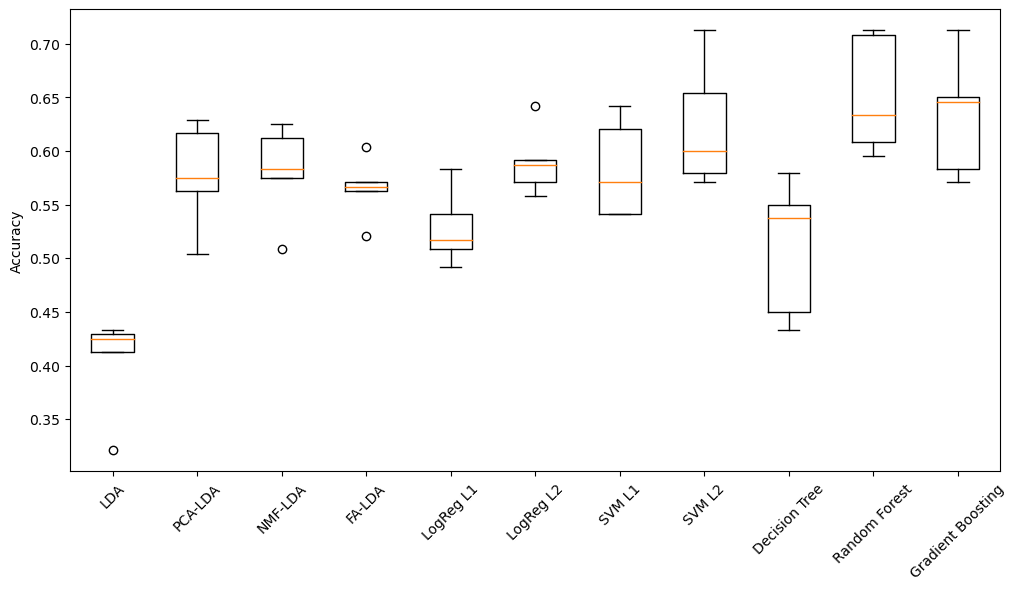

In [18]:
plt.figure(figsize=(12,6))
plt.boxplot([results[name]['test_accuracy'] for name, clf in classifiers], labels=[name for name, clf in classifiers])
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import time

def timing_with_time():
    start = time.perf_counter()
    time.sleep(1)
    end = time.perf_counter()
    print(end - start)